In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
clean_df = pd.read_csv('no_missing_data.csv')

In [20]:
clean_df.shape

(2927, 86)

In [21]:
clean_df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Lot Shape       2927 non-null   object
 2   Land Contour    2927 non-null   object
 3   Utilities       2927 non-null   object
 4   Lot Config      2927 non-null   object
 5   Land Slope      2927 non-null   object
 6   Neighborhood    2927 non-null   object
 7   Condition 1     2927 non-null   object
 8   Condition 2     2927 non-null   object
 9   Bldg Type       2927 non-null   object
 10  House Style     2927 non-null   object
 11  Roof Style      2927 non-null   object
 12  Roof Matl       2927 non-null   object
 13  Exterior 1st    2927 non-null   object
 14  Exterior 2nd    2927 non-null   object
 15  Exter Qual      2927 non-null   object
 16  Exter Cond      2927 non-null   object
 17  Foundation      2927 non-null   object
 18  Heating 

We will go trough all the remaning cathegorical features and based on our analysis we wil either normalise, one hot encode or remove the feature.

In [22]:
clean_df['MS Zoning'].value_counts()

MS Zoning
RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

In [23]:
#get the average price for each category in 'MS Zoning'
clean_df.groupby('MS Zoning')['SalePrice'].mean().sort_values(ascending=False)

MS Zoning
FV         218986.949640
RL         191302.062115
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

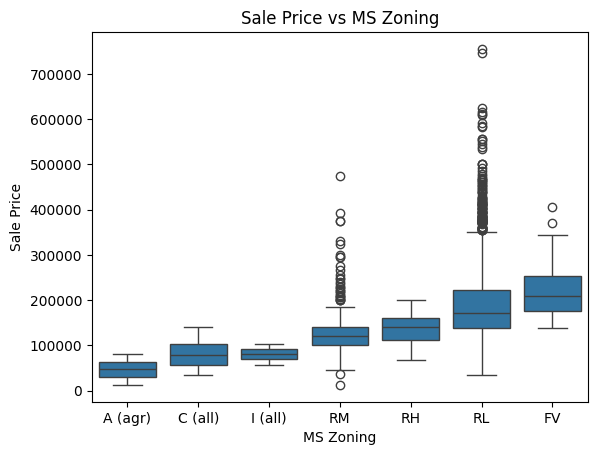

In [24]:
order = ['A (agr)', 'C (all)', 'I (all)', 'RM', 'RH', 'RL', 'FV']
sns.boxplot(x='MS Zoning', y='SalePrice', data=clean_df, order=order)
plt.xlabel('MS Zoning')
plt.ylabel('Sale Price')
plt.title('Sale Price vs MS Zoning')
plt.show()

In [25]:
df_copy = clean_df.copy(deep=True)

In [28]:
df_copy.shape

(2927, 86)

In [35]:
ms_zoning_map = {
    'A (agr)': 0,
    'C (all)': 1,
    'I (all)': 2,
    'RH': 3,
    'FV': 4,
    'RM': 5,
}
df_copy['MSZoning_encoded'] = df_copy['MS Zoning'].map(ms_zoning_map)
print(df_copy['MSZoning_encoded'].value_counts())
df_copy = df_copy.drop(['MS Zoning'], axis=1)

MSZoning_encoded
5.0    462
4.0    139
3.0     27
1.0     25
2.0      2
0.0      2
Name: count, dtype: int64


In [37]:
print(df_copy['Lot Shape'].value_counts())
print(df_copy.groupby('Lot Shape')['SalePrice'].mean().sort_values(ascending=False))

Lot Shape
Reg    1858
IR1     977
IR2      76
IR3      16
Name: count, dtype: int64
Lot Shape
IR2    229588.355263
IR3    221922.812500
IR1    210895.359263
Reg    162624.897740
Name: SalePrice, dtype: float64


By the analysis the smallest price mean is for the regular plot shapes, while the other 3 have realtive similar means, so we will drop this feature and replace it with a Has_Iregular_Lot_Shape.

In [38]:
df_copy['Has_Iregular_Lot_Shape'] = (df_copy['Lot Shape'] != 'Reg').astype(int)

print(df_copy['Has_Iregular_Lot_Shape'].value_counts())

Has_Iregular_Lot_Shape
0    1858
1    1069
Name: count, dtype: int64


In [39]:
df_copy.drop('Lot Shape', axis=1, inplace=True)
